# Step 1 - 1D linear convection

#### Differential equation to be solved

Solve equation

$$
\frac{\partial u(t, x)}{\partial t} + c \, \frac{\partial u(t, x)}{\partial x} = 0
$$

by using forward differences in time and backward differences in space: 

$$
\frac{\partial u(t, x)}{\partial t} \approx \frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} \quad ,
$$

$$
\frac{\partial u(t, x)}{\partial x} \approx \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x} \quad ,
$$

where $u^{n}_{i} \equiv u(t_{n}, x_{i})$. The resulting discrete equation is:

$$
u^{n+1}_{i} = u^{n}_{i} - c \, \frac{\Delta t}{\Delta x} \left( u^{n}_{i} - u^{n}_{i-1} \right) \quad .
$$

#### Initial conditions

At $t = 0$, 

$
u(t = 0, x) = u_{0}(x) \quad ,
$

where

$u_{0}(x) = 2$ for $0.5 \le x \le 1$

and

$u_{0}(x) = 1$ everywhere else in $(0, 2)$ .

#### Boundary conditions

$u = 1$ at $x = 0$ and $x = 2$ . 

### Import required stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define $c$, $\Delta x$, $\Delta t$ and auxiliary constants

In [2]:
nx = 41
nt = 25
dt = 0.025
c = 1
dx = 2/(nx - 1)

#### Implementation

In [3]:
# spatial coordinates
x = np.linspace(0, 2, nx)

In [4]:
print(x)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


In [5]:
# initial condition
u0 = np.ones(nx)
u0[int(0.5/dx):int(1/dx)+1] = 2

In [6]:
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


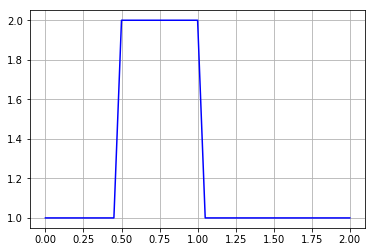

In [7]:
plt.figure()
plt.plot(x, u0, '-b')
plt.grid()
plt.show()

In [9]:
u = np.copy(u0)

# loop in time
for n in range(nt):
    un = u.copy()
    # loop in space
    for i in range(1, nx): # iterate from 1 to nx-1
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

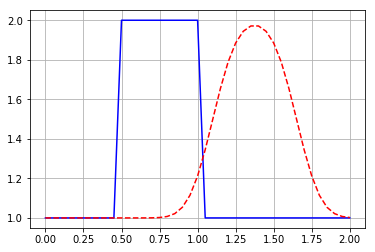

In [10]:
plt.figure()
plt.plot(x, u0, '-b')
plt.plot(x, u, '--r')
plt.grid()
plt.show()

### Create a function

In [11]:
def linear_convection_1D(u0, dt, nt, dx, nx, c):
    
    u = np.copy(u0)
    
    cte = c*dt/dx

    # loop in time
    for n in range(nt):
        un = u.copy()
        # loop in space
        for i in range(1, nx): # iterate from 1 to nx
            u[i] = un[i] - cte * (un[i] - un[i-1])
    
    return u

In [12]:
nt = 100
dt = 0.005
c = 1

nx = [20, 40, 60, 80, 100, 120]
u = []
x = []
u0 = []

for nxi in nx:
    dx = 2/(nxi - 1)
    u0i = np.ones(nxi)
    u0i[int(0.5/dx):int(1/dx)+1] = 2
    u0.append(u0i)
    u.append(linear_convection_1D(u0i, dt, nt, dx, nxi, c))
    x.append(np.linspace(0, 2, nxi))

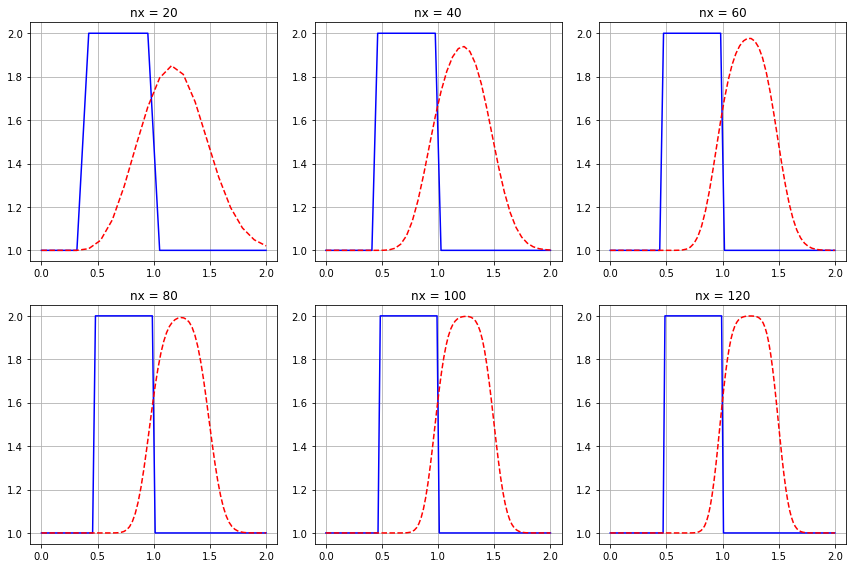

In [13]:
plt.figure(figsize=(12,8))

for i, (nxi, xi, u0i, ui) in enumerate(zip(nx, x, u0, u)):

    plt.subplot(2,3,i+1)
    plt.title('nx = %d' % (nxi))
    plt.plot(xi, u0i, '-b')
    plt.plot(xi, ui, '--r')
    plt.grid()

plt.tight_layout()
plt.show()